# Introduction

New York City (NYC) is one of the most-visited cities in the world. As a result, there are many Airbnb listings to meet the high demand for temporary lodging for anywhere between a few nights to many months. In this notebook, the NYC Airbnb market will by analyzed by combining data from multiple file types such as .csv, .tsv, and .xlsx.

Three datasets will be used for this analysis:

"airbnb_price.csv"

"airbnb_room_type.xlsx"

"airbnb_last_review.tsv"

The goals of this analysis will be to convert untidy data into appropriate formats for analysis, and answer key questions including:

What is the average price, per night, of an Airbnb listing in NYC?

How does the average price of an Airbnb listing, per month, compare to the private rental market?

How many adverts are for private rooms?

How do Airbnb listing prices compare across the five NYC boroughs?

# 1. Importing the Data

In [17]:
# Import necessary packages
import pandas as pd
import numpy as np
import datetime as dt

# Load airbnb_price.csv, prices
prices = pd.read_csv('airbnb_price.csv')

# Load airbnb_room_type.xlsx, xls
xls = pd.ExcelFile("airbnb_room_type.xlsx")

# Parse the first sheet from xls, room_types
room_types = xls.parse(0)

# Load airbnb_last_review.tsv, reviews
reviews = pd.read_csv('airbnb_last_review.tsv', sep = '\t')

# Print the first five rows of each DataFrame
print(prices.head(), "\n", room_types.head(), "\n", reviews.head())

   listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown 
    listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt 
    listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          

# 2. Cleaning the price column

Now the DataFrames have been loaded, the first step is to calculate the average price per listing by room_type.

The price column in the prices DataFrame currently states each value as a string with the currency (dollars) following, i.e.,

price

225 dollars

89 dollars

200 dollars

The price column will need to be cleaned in order to calculate the average price.

In [18]:
# Remove whitespace and string characters from prices column
prices["price"] = prices["price"].str.replace(" dollars", "")

# Convert prices column to numeric datatype
prices["price"] = pd.to_numeric(prices["price"])

# Print descriptive statistics for the price column
print(prices["price"].describe())

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


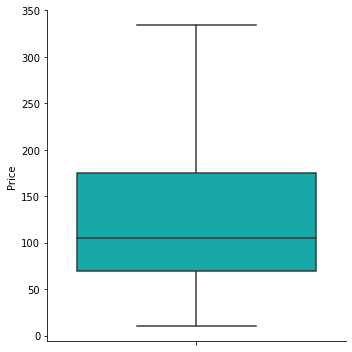

In [180]:
# Create boxplot displaying distribution of prices without outliers
g = sns.catplot(y = 'price', data = prices, kind = 'box', sym = "", color = 'c')
g.set_axis_labels('', 'Price')
plt.show()

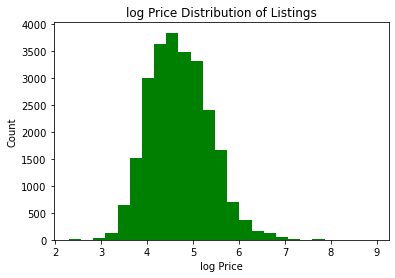

In [183]:
# Create histogram displaying price distribution among listings with a log transformation of the price column
fig, ax = plt.subplots()
ax.hist(price_series, bins = 25, color = 'g')
ax.set_xlabel('log Price')
ax.set_ylabel('Count')
ax.set_title('log Price Distribution of Listings')
plt.show()


# 3. Calculating average price

Three quarters of listings cost $175 per night or less.

However, there are some outliers including a maximum price of $7,500 per night!

Some of the listings are actually showing as free. This doesn't make sense. These outlier values will be removed from the DataFrame, then the average price per night for an Airbnb listing will be calculated.

In [19]:
# Subset prices for listings costing $0, free_listings
free_listings = prices["price"] == 0

# Update prices by removing all free listings from prices
prices = prices.loc[~free_listings]

# Calculate the average price, avg_price
avg_price = round(prices["price"].mean(), 2)

# Print the average price
print("The average price per night for an Airbnb listing in NYC is ${}.".format(avg_price))

The average price per night for an Airbnb listing in NYC is $141.82.


# 4. Comparing costs to the private rental market

Now that the average, per night listing cost of an NYC Airbnb is known, it would be useful to have a benchmark for comparison. According to Zumper, a 1 bedroom apartment in New York City costs, on average, $3,100 per month. Converting the per night prices of the listings into monthly costs will allow a comparison to the private rental market.

In [20]:
# Add a new column to the prices DataFrame, price_per_month
prices["price_per_month"] = prices["price"] * 365 / 12

# Calculate average_price_per_month
average_price_per_month = round(prices['price_per_month'].mean(), 2)

# Compare Airbnb and rental market
print("airbnb monthly costs are ${}, while in the private market you would pay {}.".format(average_price_per_month, "$3,100.00"))

airbnb monthly costs are $4313.61, while in the private market you would pay $3,100.00.


# 5. Cleaning the room type column

Using Airbnb appears to be substantially more expensive than the private rental market. It should be considered, however, that these Airbnb listings include single private rooms or even rooms to share, as well as entire homes/apartments.

The room_type column should be explored in order to find out the breakdown of listings by type of room. The room_type column has several variations for private room listings, specifically:

"Private room"

"private room"

"PRIVATE ROOM"

This can be dealt with by converting all string characters to lower case.

In [21]:
# Convert the room_type column to lowercase
room_types["room_type"] = room_types["room_type"].str.lower()

# Update the room_type column to category data type
room_types["room_type"] = room_types["room_type"].astype("category")

# Create the variable room_frequencies
room_frequencies = room_types["room_type"].value_counts()

# Print room_frequencies
print(room_frequencies)

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64


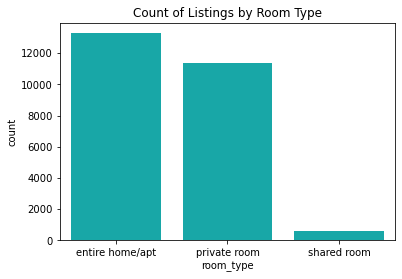

In [191]:
# Create bar plot for count of listings broken down by room type
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.countplot(x = room_types["room_type"], data = room_types, color = 'c')
g.set_title('Count of Listings by Room Type')
plt.show()

# 6. What about the timeframe?

There seems to be a fairly similar sized market opportunity for both private rooms (45% of listings) and entire homes/apartments (52%) on the Airbnb platform in NYC.


Examining the reviews DataFrame, the last_review column contains the date of the last review in the format of "Month Day Year" e.g., May 21 2019. The earliest and latest review dates in the DataFrame will be examined in order to ensure the format allows this analysis to be easily conducted going forward.

In [6]:
# Change the data type of the last_review column to datetime
reviews["last_review"] = pd.to_datetime(reviews["last_review"])

# Create first_reviewed, the earliest review date
first_reviewed = reviews["last_review"].dt.date.min()

# Create last_reviewed, the most recent review date
last_reviewed = reviews["last_review"].dt.date.max()

# Print the oldest and newest reviews from the DataFrame
print("The latest Airbnb review is {}, the earliest review is {}".format(last_reviewed, first_reviewed))

The latest Airbnb review is 2019-07-09, the earliest review is 2019-01-01


# 7. Joining the DataFrames.

Now that the information needed has been extracted, the three DataFrames will be merged in order to make any future analysis easier to conduct. Once the data has been joined, any observations with missing values will be removed. Then the dataframe will be checked for any duplicate values. 

In [7]:
# Merge prices and room_types to create rooms_and_prices
rooms_and_prices = prices.merge(room_types, how= 'outer', on= 'listing_id')

# Merge rooms_and_prices with the reviews DataFrame to create airbnb_merged
airbnb_merged = rooms_and_prices.merge(reviews, how = 'outer', on = 'listing_id')

# Drop missing values from airbnb_merged
airbnb_merged.dropna(inplace = True)

# Check if there are any duplicate values
print("There are {} duplicates in the DataFrame.".format(airbnb_merged.duplicated().sum()))

There are 0 duplicates in the DataFrame.


In [38]:
airbnb_merged.head()

,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review,borough,price_range
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21,Manhattan,Expensive
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05,Brooklyn,Average
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22,Manhattan,Expensive
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24,Manhattan,Average
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09,Manhattan,Average


# 8. Analyzing listing prices by NYC borough

Now that all data has been combined into a single DataFrame, differences in listing prices between New York City boroughs will be examined. The boroughs are currently listed as the first part of a string within the nbhood_full column, e.g.,

Manhattan, Midtown

Brooklyn, Clinton Hill

Manhattan, Murray Hill

Manhattan, Hell's Kitchen

Manhattan, Chinatown

This information will be extracted from the string and stored in a new column, borough, for analysis.

In [165]:
# Extract information from the nbhood_full column and store as a new column, borough
airbnb_merged["borough"] = airbnb_merged["nbhood_full"].str.partition(",")[0]

# Group by borough and calculate summary statistics
boroughs = airbnb_merged.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

# Round boroughs to 2 decimal places, and sort by mean in descending order
boroughs = boroughs.round(2).sort_values("mean", ascending= False)

# Print boroughs
print(boroughs)

                     sum    mean  median  count
borough                                        
Manhattan      1898417.0  184.04   149.0  10315
Brooklyn       1275250.0  122.02    95.0  10451
Queens          320715.0   92.83    70.0   3455
Staten Island    22974.0   86.04    71.0    267
Bronx            55156.0   79.25    65.0    696


In [168]:
# Needed to reset index in order to pass borough column to plot function
boroughs.reset_index(inplace = True, drop = False)

Text(0, 0.5, 'Count')

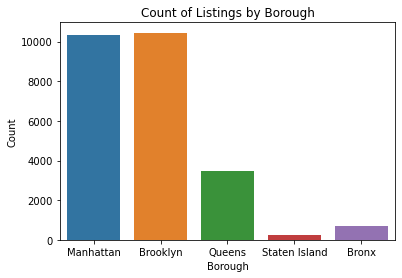

In [176]:
# Create count plot of number of listings in each borough
g = sns.barplot(x = 'borough', y = 'count', data = boroughs)
g.set_title('Count of Listings by Borough')
g.set_xlabel('Borough')
g.set_ylabel('Count')

# 9. Price range by borough

The above output provides a summary of prices for listings across the 5 boroughs. In this final task listings will be categorized based on whether they fall into specific price ranges. This information will be broken down by borough.

This can be done using percentiles and labels to create a new column, price_range, in the DataFrame. Once the labels have been created, the data can be grouped and frequencies can be counted for listings in each price range by borough.

The following categories and price ranges will be assigned:

Budget:      $ 0-69

Average:     $ 70-175

Expensive:   $ 176-350

Extravagant: $ 350+

In [9]:
# Create labels for the price range, label_names
label_names = ['Budget', 'Average', 'Expensive', 'Extravagant']

# Create the label ranges, ranges
ranges = [0, 69, 175, 350, np.inf]

# Insert new column, price_range, into DataFrame
airbnb_merged["price_range"] = pd.cut(airbnb_merged["price"], bins= ranges, labels= label_names)

# Calculate borough and price_range frequencies, prices_by_borough
prices_by_borough = airbnb_merged.groupby(['borough', 'price_range'])['price_range'].count()
print(prices_by_borough)

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
               Extravagant       0
Name: price_range, dtype: int64


In [207]:
# Convert price_by_borough series to dataframe
data = {'price_category_count': prices_by_borough}
price_df = pd.DataFrame.from_dict(data)


In [208]:
# Reset index so borough and price_range can be incorporated into barplot
price_df.reset_index(inplace = True, drop = False)
price_df.index

RangeIndex(start=0, stop=20, step=1)

Text(0, 0.5, 'Count')

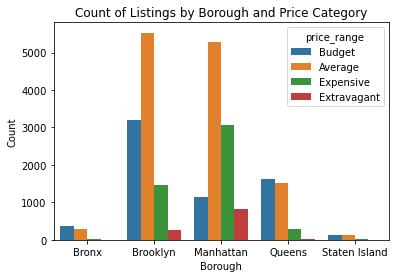

In [211]:
# Create barplot showing counts of listings broken down by price range category and borough
g = sns.barplot(x = 'borough', y = 'price_category_count', hue = 'price_range', data = price_df)
g.set_title('Count of Listings by Borough and Price Category')
g.set_xlabel('Borough')
g.set_ylabel('Count')

# Conclusion

From the output above it appears that Manhattan has by far the most listings that fall under the Expensive and Extravagent price ranges. Staten Island has the lowest Airbnb rental prices overall. 